In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean

In [2]:
# load data
with open("../Data/RamR_homolog_screening.xlsx", 'rb') as f:
   data = pd.read_excel(f, sheet_name="data")

grouped_data = {}

for row in data.iterrows():
   homolog = row[1]["Name"][:-2]
   if homolog not in grouped_data.keys():
      grouped_data[homolog] = [row[1]["Fold_Change"]]
   else:
      grouped_data[homolog].append(row[1]["Fold_Change"])

print(grouped_data)

{'EHW9072577_90': [2.209687599, 1.776882909, 3.804745809], 'WP000113600_90': [14.7406257, 2.504198344, 5.189528167], 'WP128277524_90': [1.014350236, 0.9881039864, 0.9873752228], 'WP159317468_90': [1.118499203, 1.098271374, 1.066971804], 'WP060568946_80': [1.769834565, 1.692147371, 1.864287892], 'WP061076761_80': [5.493447413, 4.659489289, 3.909084807], 'WP101699783_80': [2.170736897, 1.780985086, 1.988009875], 'WP232795901_80': [1.213022856, 1.18550941, 1.184696404], 'WP023479842_70': [1.340914786, 1.373039792, 1.311358884], 'WP090460814_70': [1.318838467, 1.323324851, 1.226764223], 'WP085005645_70': [1.187291014, 1.142378415, 1.130490297], 'CZX90588_70': [19.36212201, 19.19368369, 19.4638681], 'RamR': [61.66148203, 58.51658624, 63.71681894]}


In [3]:
# calculate averages
averages = {}
for i in grouped_data:
    average = mean(grouped_data[i])
    averages[i] = average

print(averages)


{'EHW9072577_90': 2.597105439, 'WP000113600_90': 7.478117403666667, 'WP128277524_90': 0.9966098150666667, 'WP159317468_90': 1.0945807936666667, 'WP060568946_80': 1.775423276, 'WP061076761_80': 4.687340503, 'WP101699783_80': 1.9799106193333333, 'WP232795901_80': 1.1944095566666668, 'WP023479842_70': 1.341771154, 'WP090460814_70': 1.2896425136666667, 'WP085005645_70': 1.1533865753333332, 'CZX90588_70': 19.339891266666665, 'RamR': 61.29829573666667}


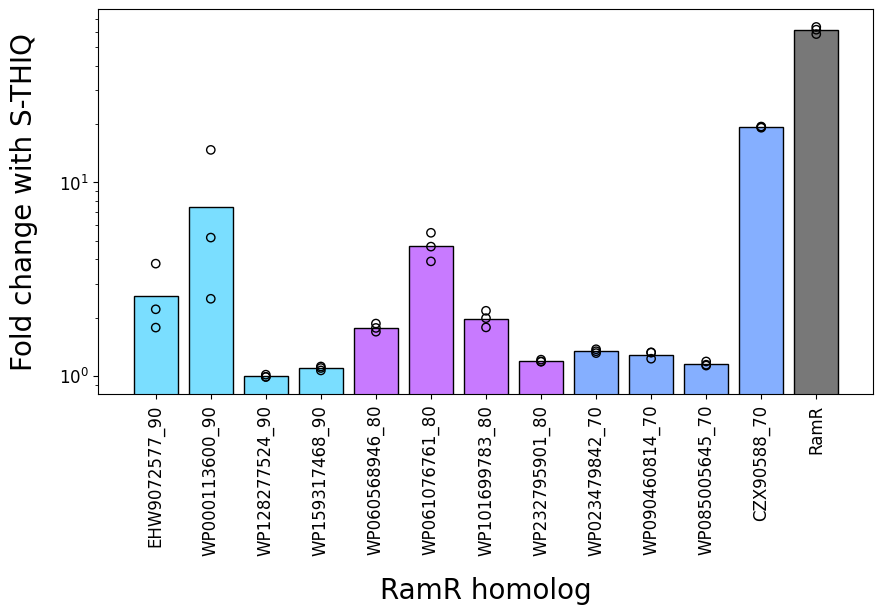

In [4]:
# format data for plotting individual points
keys_3 = [[i]*3 for i in grouped_data.keys()]
values_3 = [i for i in grouped_data.values()]
colors = ["#7adeff", "#7adeff", "#7adeff","#7adeff","#c87aff","#c87aff","#c87aff","#c87aff","#85afff","#85afff","#85afff","#85afff","#787878"]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
    
plt.xlabel("RamR homolog", fontsize=20, labelpad=15)
plt.ylabel("Fold change with S-THIQ", fontsize=20, labelpad=15)
ax.set_yscale("log")
plt.bar(averages.keys(), averages.values(), edgecolor="#000000", color=colors)
for i in range(0,len(grouped_data.keys())):
    plt.scatter(keys_3[i], values_3[i], edgecolor="#000000", color="None")

# plt.savefig("SVG/RamR_homolog_screen.svg", format="svg")
plt.show()